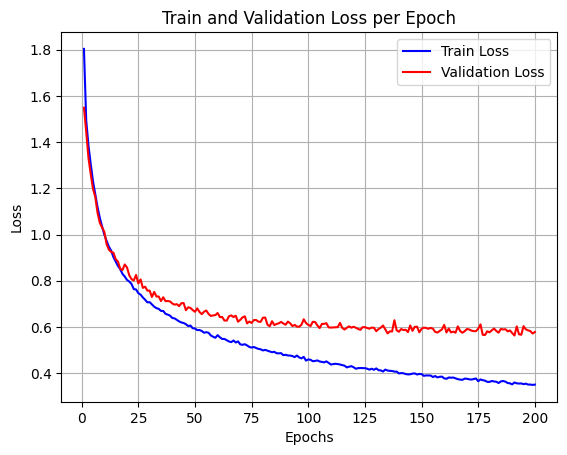

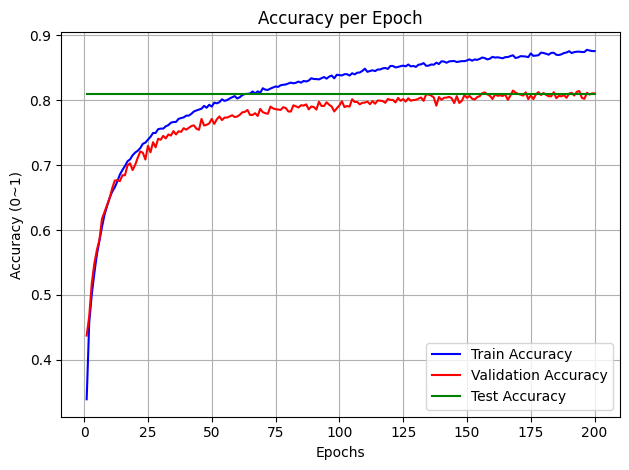

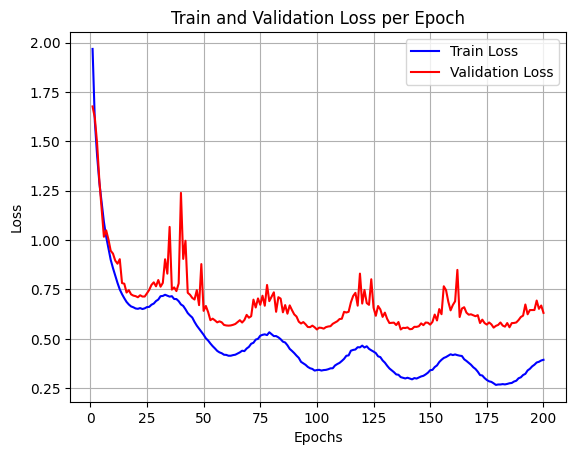

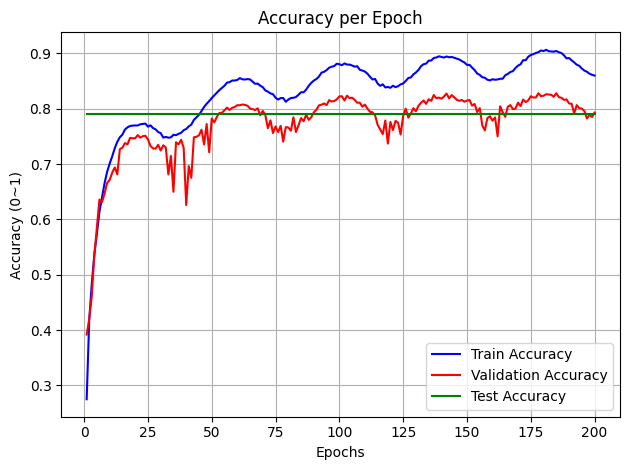

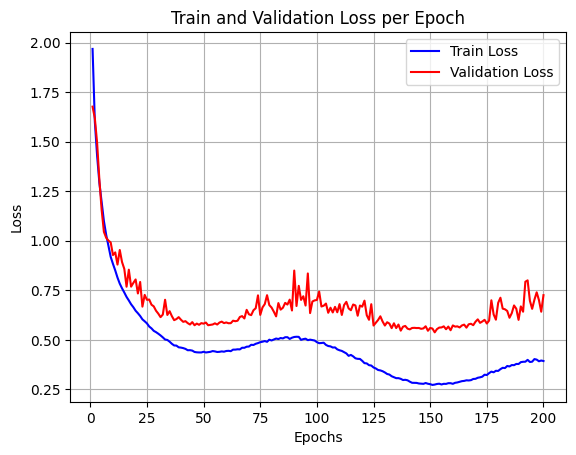

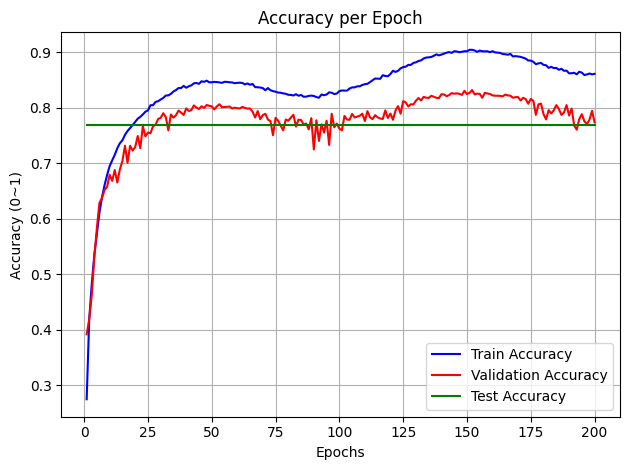

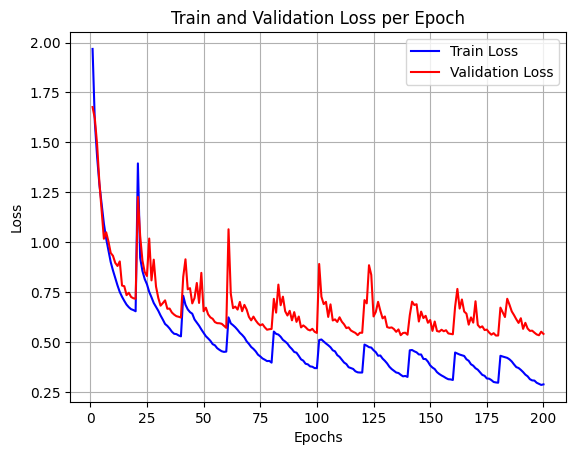

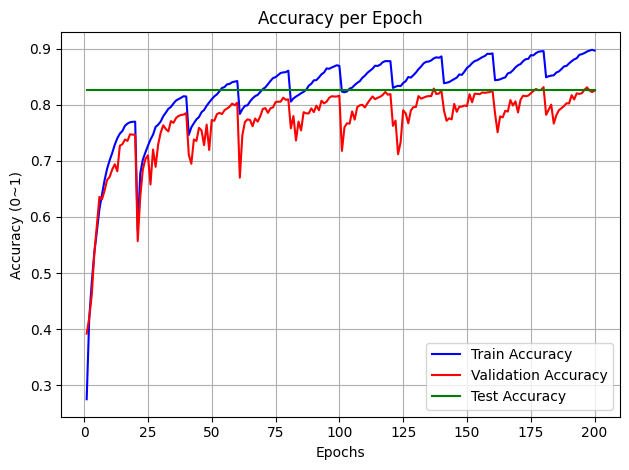

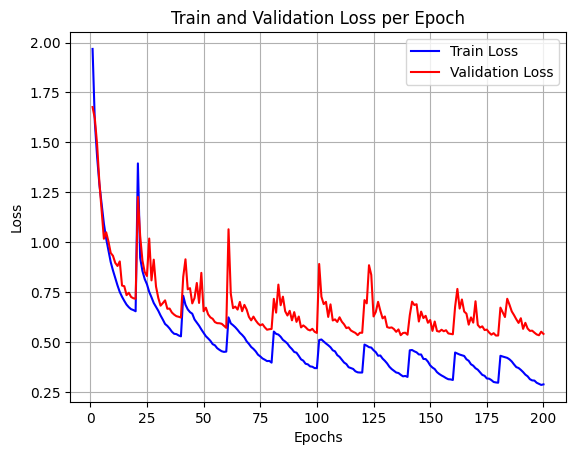

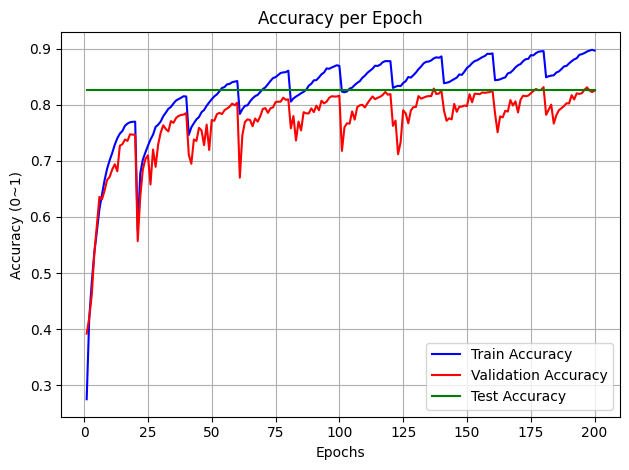

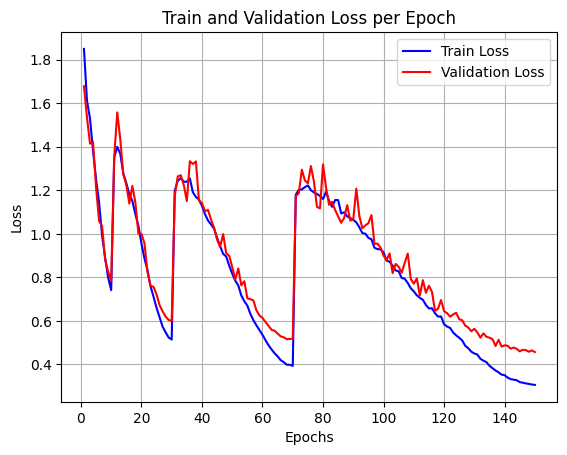

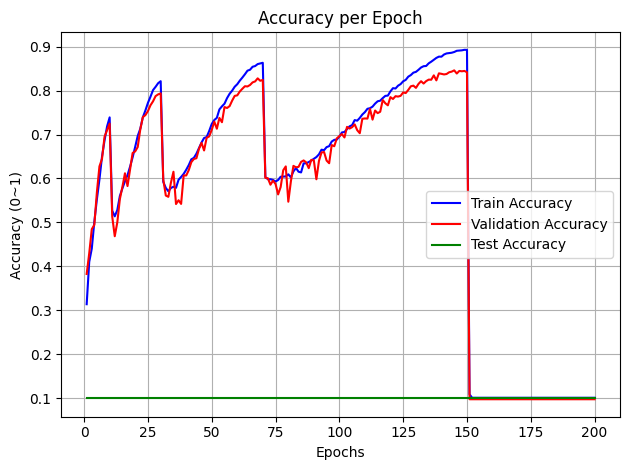

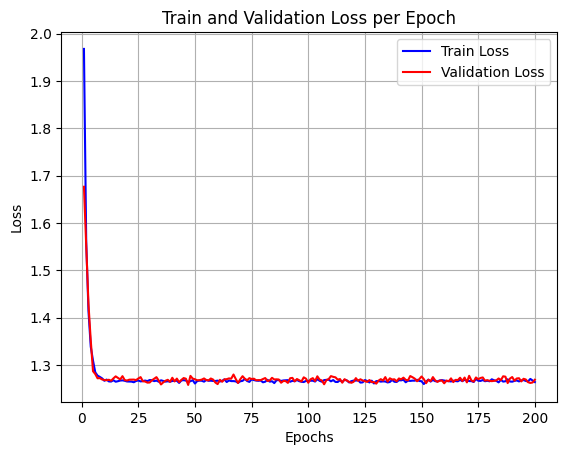

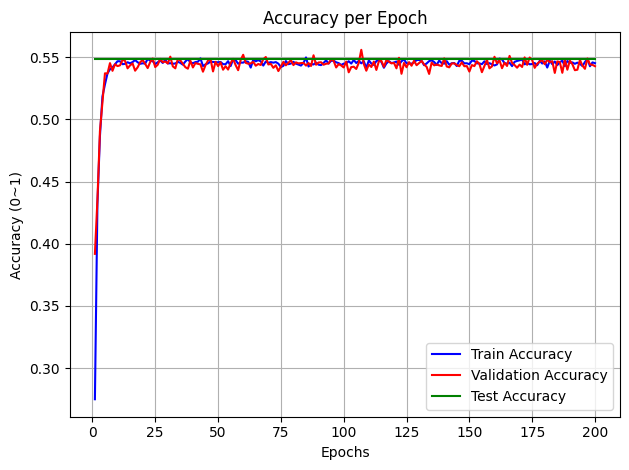

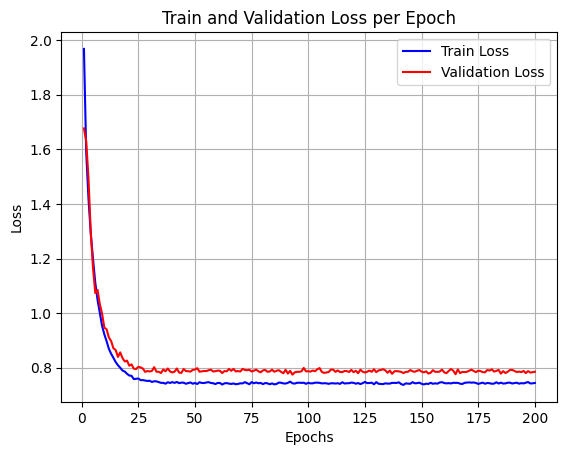

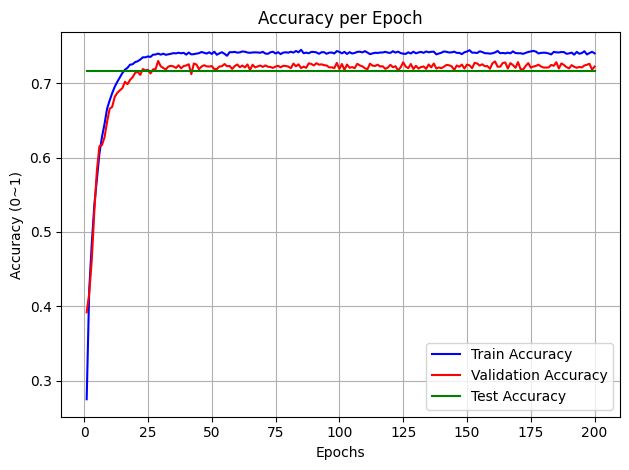

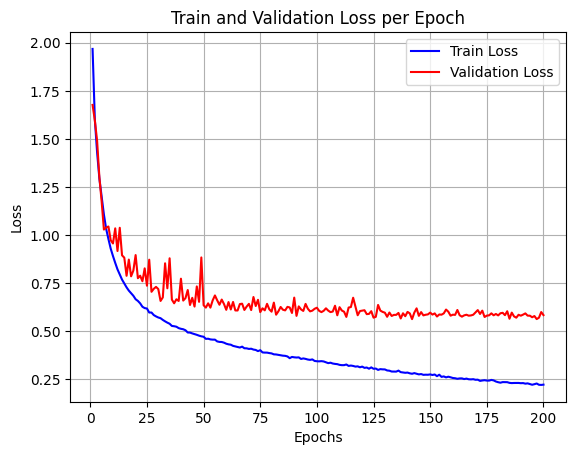

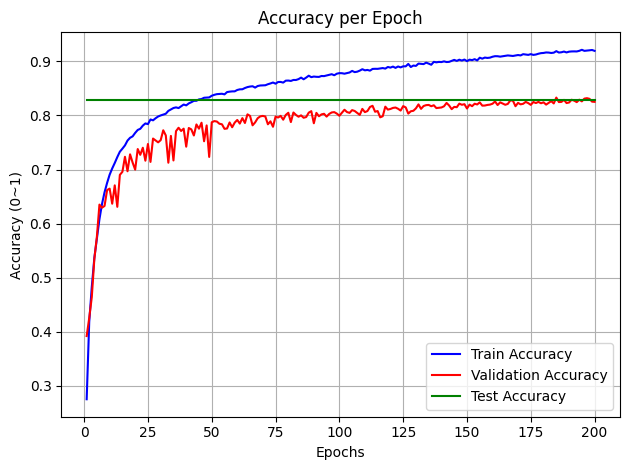

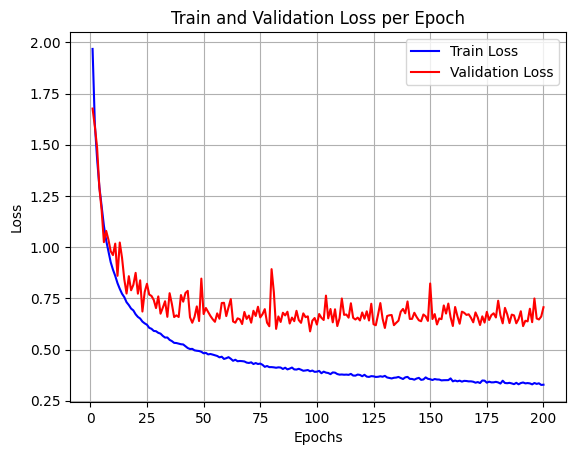

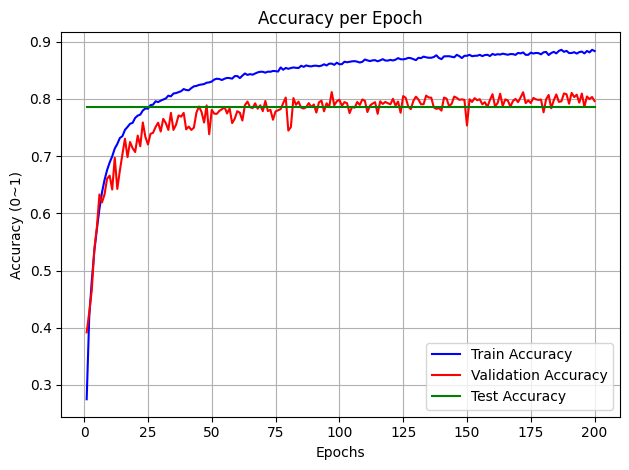

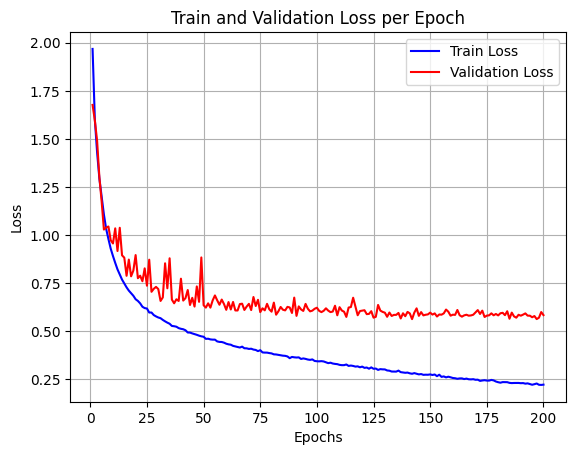

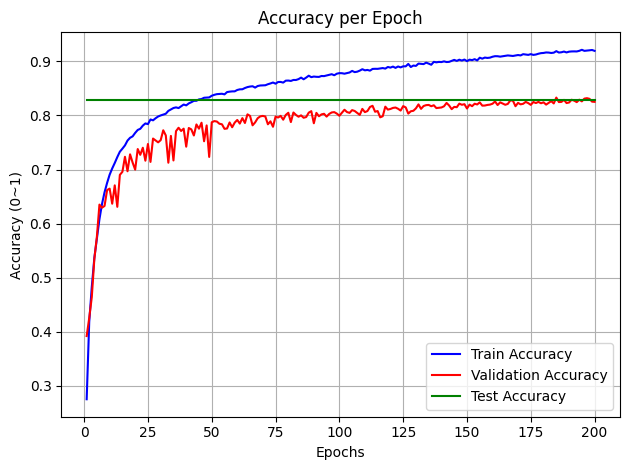

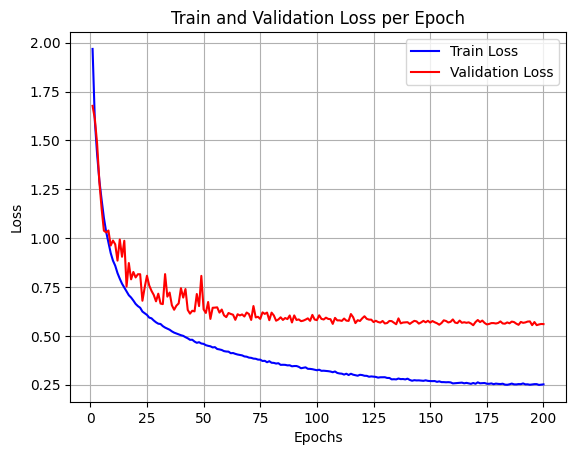

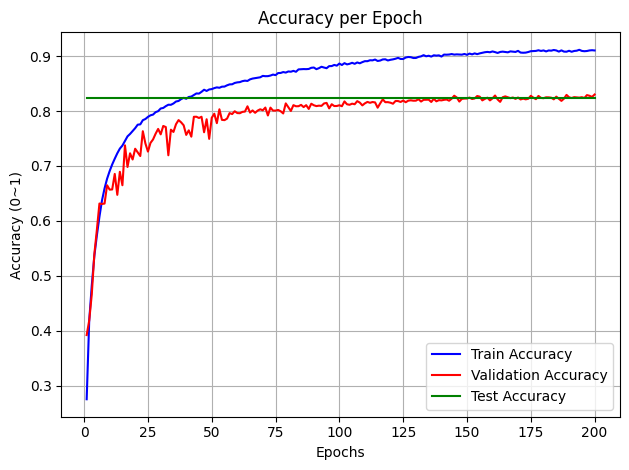

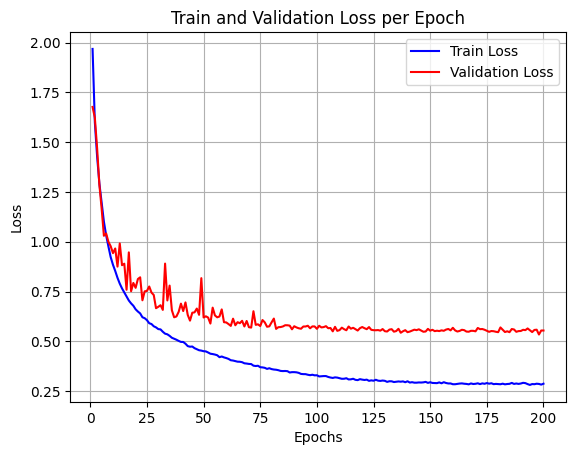

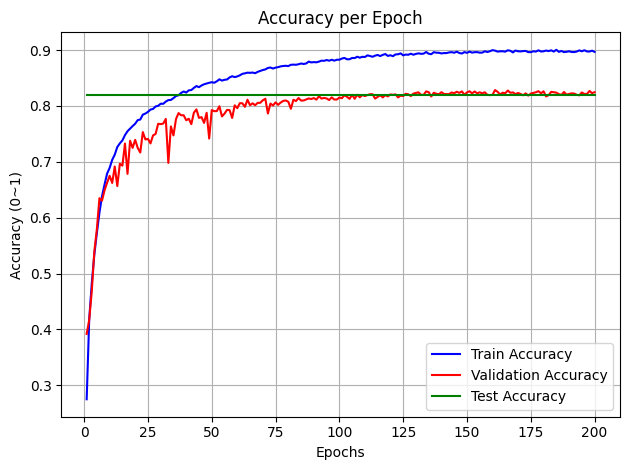

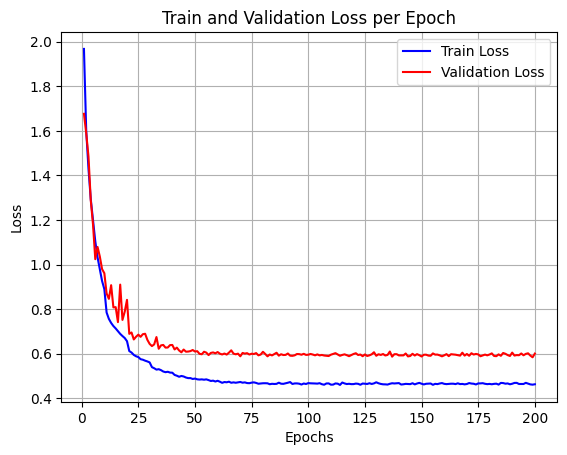

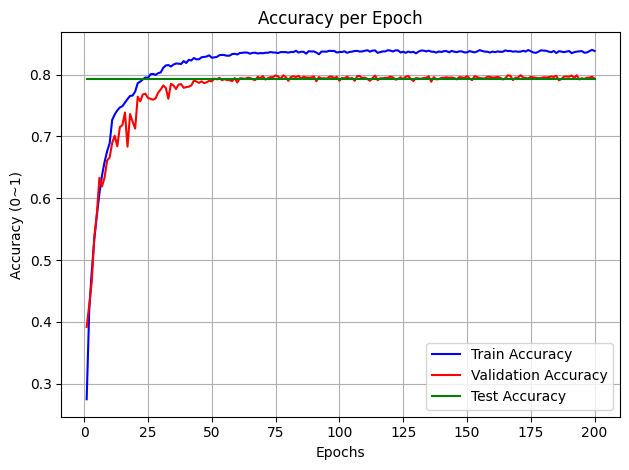

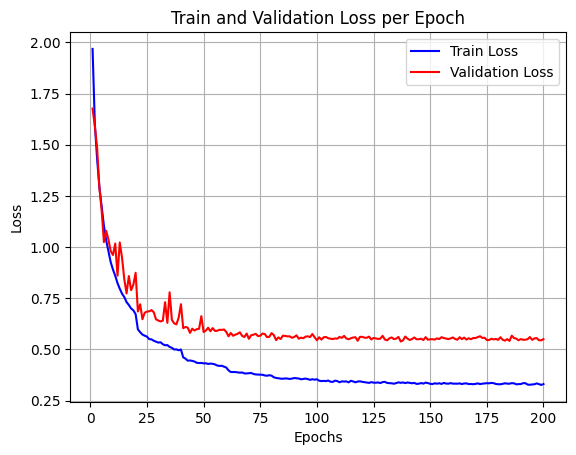

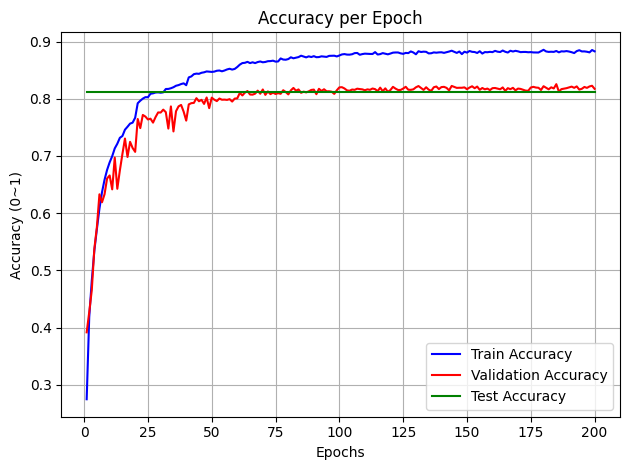

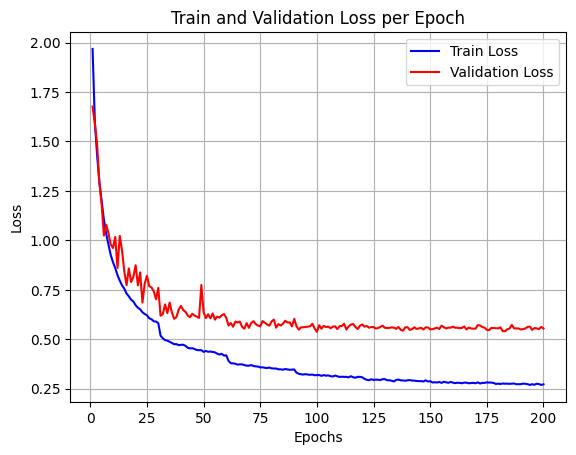

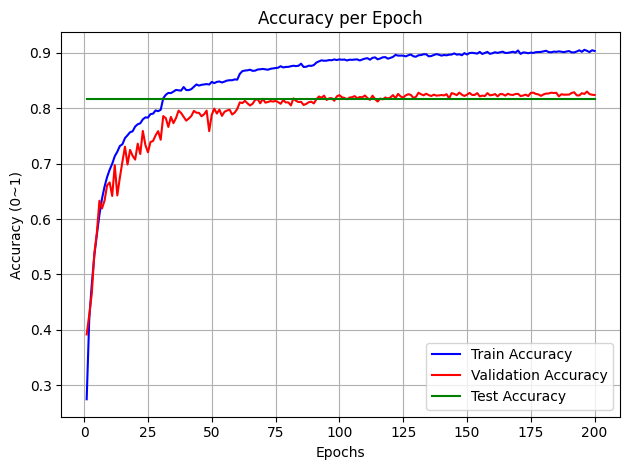

In [2]:
import matplotlib.pyplot as plt
import csv
import os

def read_logs(csv_file):
    epochs = []
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    test_accuracies = []

    with open(csv_file, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            epochs.append(int(row['epoch']))
            train_losses.append(float(row['train_loss']))
            val_losses.append(float(row['val_loss']))
            train_accuracies.append(float(row['train_accuracy']) / 100)  # 퍼센트에서 0~1 스케일로 변환
            val_accuracies.append(float(row['val_accuracy']) / 100)  # 퍼센트에서 0~1 스케일로 변환
            test_accuracies.append(float(row['test_accuracy']) / 100)  # 퍼센트에서 0~1 스케일로 변환

    return epochs, train_losses, val_losses, train_accuracies, val_accuracies, test_accuracies

def plot_logs(epochs, train_losses, val_losses, train_accuracies, val_accuracies, test_accuracies, csv_file):
    # plt.figure(figsize=(15, 5))
    base_name = os.path.basename(csv_file)
    name_without_ext = os.path.splitext(base_name)[0]
    output_dir = 'new_png'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    loss_plot_file = os.path.join(output_dir, f'{name_without_ext}_loss.png')
    accuracy_plot_file = os.path.join(output_dir, f'{name_without_ext}_accuracy.png')
    # Plot loss
    # plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'b', label='Train Loss')
    plt.plot(epochs, val_losses, 'r', label='Validation Loss')
    plt.title('Train and Validation Loss per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.savefig(loss_plot_file)
    plt.show()
    # Plot accuracy
    plt.plot(epochs, train_accuracies, 'b', label='Train Accuracy')
    plt.plot(epochs, val_accuracies, 'r', label='Validation Accuracy')
    plt.plot(epochs, test_accuracies, 'g', label='Test Accuracy')
    plt.title('Accuracy per Epoch')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (0~1)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(accuracy_plot_file)
    plt.show()

# csv_file = 'new_csv/cwar_training_logs.csv'

# epochs, train_losses, val_losses, train_accuracies, val_accuracies, test_accuracies = read_logs(csv_file)

# plot_logs(epochs, train_losses, val_losses, train_accuracies, val_accuracies, test_accuracies, csv_file)

def process_all_csv_files(directory):
    for file_name in os.listdir(directory):
        if file_name.endswith('.csv'):
            csv_file = os.path.join(directory, file_name)
            epochs, train_losses, val_losses, train_accuracies, val_accuracies, test_accuracies = read_logs(csv_file)
            plot_logs(epochs, train_losses, val_losses, train_accuracies, val_accuracies, test_accuracies, csv_file)

csv_directory = 'new_csv'
process_all_csv_files(csv_directory)